Teste feito com as seguintes observações
- Colunas cabine, nome, ticket e embarked foram excluidas
- Idades faltantes preenchidas com a média aritimética
- Valores padronizados
- k = 17
- Acuracia: 78%

Importando as bibliotecas necessárias

In [46]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

Lendo o arquivo de treino

In [47]:
df = pd.read_csv('train.csv')

In [48]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Tratando as idades faltantes
 - Aplicado a media das idades nos registros faltantes

In [49]:
df['Age'] = df['Age'].fillna(round(df['Age'].mean()))

In [50]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Removendo as colunas 'Name', 'Cabin', 'Ticket' e 'Embarked'

In [51]:
df = df.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

In [52]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000
887,888,1,1,female,19.0,0,0,30.0000
888,889,0,3,female,30.0,1,2,23.4500
889,890,1,1,male,26.0,0,0,30.0000


Com a coluna de genero, iremos atribuir 0 para feminino e 1 para masculino 

In [53]:
df['Sex'] = df['Sex'].replace({'female': 0, 'male': 1})

C:\Users\maste\AppData\Local\Temp\ipykernel_22772\409730233.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'female': 0, 'male': 1})


In [54]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000
887,888,1,1,0,19.0,0,0,30.0000
888,889,0,3,0,30.0,1,2,23.4500
889,890,1,1,1,26.0,0,0,30.0000


Padronizando os dados

In [55]:
obj_standard = StandardScaler().fit(df)
df_standardized = obj_standard.transform(df)
df_standardized = pd.DataFrame(df_standardized, columns=df.columns)
df_standardized.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,-1.730108,-0.789272,0.827377,0.737695,-0.597055,0.432793,-0.473674,-0.502445
1,-1.726220,1.266990,-1.566107,-1.355574,0.634162,0.432793,-0.473674,0.786845
2,-1.722332,1.266990,0.827377,-1.355574,-0.289251,-0.474545,-0.473674,-0.488854
3,-1.718444,1.266990,-1.566107,-1.355574,0.403309,0.432793,-0.473674,0.420730
4,-1.714556,-0.789272,0.827377,0.737695,0.403309,-0.474545,-0.473674,-0.486337


In [56]:
df_standardized.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,6.379733e-17,3.987333e-17,-8.772133e-17,-1.156327e-16,1.594933e-16,4.386066e-17,5.382900e-17,3.987333e-18
std,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00
min,-1.730108e+00,-7.892723e-01,-1.566107e+00,-1.355574e+00,-2.257659e+00,-4.745452e-01,-4.736736e-01,-6.484217e-01
25%,-8.650540e-01,-7.892723e-01,-3.693648e-01,-1.355574e+00,-5.970548e-01,-4.745452e-01,-4.736736e-01,-4.891482e-01
50%,0.000000e+00,-7.892723e-01,8.273772e-01,7.376951e-01,1.855376e-02,-4.745452e-01,-4.736736e-01,-3.573909e-01
75%,8.650540e-01,1.266990e+00,8.273772e-01,7.376951e-01,4.033091e-01,4.327934e-01,-4.736736e-01,-2.424635e-02
max,1.730108e+00,1.266990e+00,8.273772e-01,7.376951e-01,3.866107e+00,6.784163e+00,6.974147e+00,9.667167e+00


Agora iremos definir o X e o y, removendo a coluna 'Survived' que é o alvo

In [57]:
X = df_standardized.drop(['Survived',], axis=1)
y = df['Survived']

In [58]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,-1.730108,0.827377,0.737695,-0.597055,0.432793,-0.473674,-0.502445
1,-1.726220,-1.566107,-1.355574,0.634162,0.432793,-0.473674,0.786845
2,-1.722332,0.827377,-1.355574,-0.289251,-0.474545,-0.473674,-0.488854
3,-1.718444,-1.566107,-1.355574,0.403309,0.432793,-0.473674,0.420730
4,-1.714556,0.827377,0.737695,0.403309,-0.474545,-0.473674,-0.486337
...,...,...,...,...,...,...,...
886,1.714556,-0.369365,0.737695,-0.212299,-0.474545,-0.473674,-0.386671
887,1.718444,-1.566107,-1.355574,-0.827908,-0.474545,-0.473674,-0.044381
888,1.722332,0.827377,-1.355574,0.018554,0.432793,2.008933,-0.176263
889,1.726220,-1.566107,0.737695,-0.289251,-0.474545,-0.473674,-0.044381


In [59]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

Separamos os dados para treino, 80% para treino e 20% para validação

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Cross validation

Melhor valor de k: 5
Melhor acurácia: 0.8207


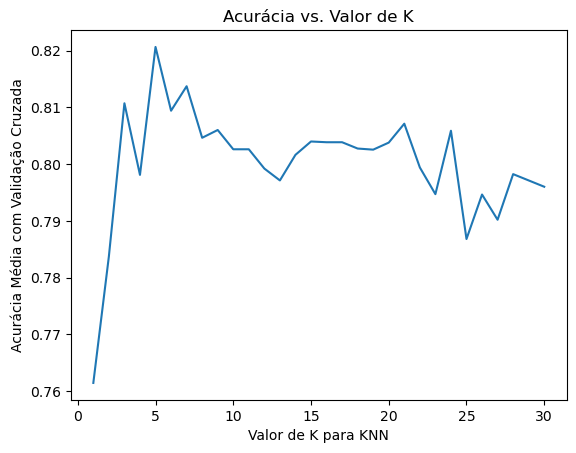

In [61]:
k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=50, scoring='accuracy')
    k_scores.append(scores.mean())

melhor_k = k_range[k_scores.index(max(k_scores))]
melhor_score = max(k_scores)

print(f"Melhor valor de k: {melhor_k}")
print(f"Melhor acurácia: {melhor_score:.4f}")

plt.plot(k_range, k_scores)
plt.xlabel('Valor de K para KNN')
plt.ylabel('Acurácia Média com Validação Cruzada')
plt.title('Acurácia vs. Valor de K')
plt.show()

Definimos o modelo de classificação

In [68]:
knn = KNeighborsClassifier(n_neighbors=5)

Treinamos o modelo

In [69]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

Acuracia do modelo

In [70]:
print(knn.score(X_test, y_test))

0.7988826815642458


Predição do modelo

In [71]:
y_pred = knn.predict(X_test)

Matriz de confusão

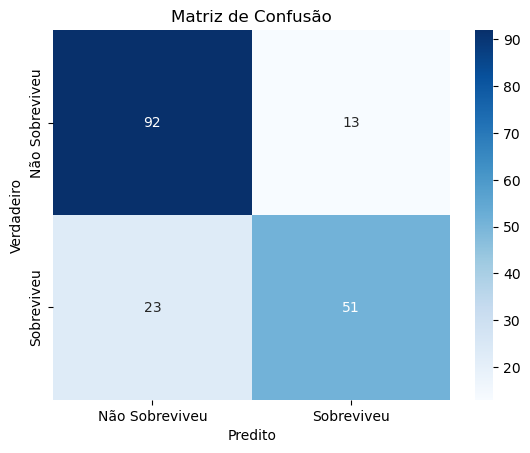

In [72]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Sobreviveu', 'Sobreviveu'], yticklabels=['Não Sobreviveu', 'Sobreviveu'])
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

Relatório de classificação

In [73]:
print(classification_report(y_test, y_pred, target_names=['Não Sobreviveu', 'Sobreviveu']))

                precision    recall  f1-score   support

Não Sobreviveu       0.80      0.88      0.84       105
    Sobreviveu       0.80      0.69      0.74        74

      accuracy                           0.80       179
     macro avg       0.80      0.78      0.79       179
  weighted avg       0.80      0.80      0.80       179

